<a href="https://colab.research.google.com/github/bala-codes/FAKE-VS-REAL-NEWS-CLASSIFIER-USING-ML-AND-DL-MODELS/blob/master/codes%20(LSTM%20%2B%20W_Embedding)/Fake%20News%20Classifier%20LSTM%20with%20Glove%20Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Importing the libraries which are required.
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.utils.np_utils import to_categorical
from sklearn import metrics
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [ ]:
#Importing the libraries which are required.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [ ]:
final_df = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/FAKE VS REAL NEWS - FINAL DATASETS/fakerealnews.csv',usecols = ['title','text','label']) 
final_df = pd.DataFrame(final_df)

#final_df.dropna(inplace=True)
final_df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
final_df['SECTION'] = final_df['title'] + " " + final_df['text']

In [ ]:
to_replace = {"don't": "do not", "dont": "do not","doesn't": "does not", "doesnt": "does not","didn't": "did not", "didnt": "did not","shouldn't": "should not", "shouldnt": "should not",
              "haven't": "have not", "hvn't": "have not","havent": "have not", "hadn't": "had not","hadnt": "had not", "cannt": "can not","cann't": "can not", "couldn't": "could not",
              "couldnt": "could not", "nt": "not","ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
               "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
               "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
               "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
               "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
               "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
               "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
               "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
               "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are","what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
               "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have","why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
               "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
               "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have","you're": "you are", "you've": "you have"}

stopwords = ['i', 'me', 'mine', 'he', 'she', 'it', 'a', 'an', 'the','above', 'below', 'while', 'as', 'until', 'of', 'at', 'down', 'if', 'to', 'or', 'was', 'were', 'itself', 'for',
             'other', 'both', 'any', 'all', 'between', 'do', 'does', 'did', 'on', 'own', 'who', 'whom', 'this', 'that', 'has','have', 'here', 'some', 'why', 'same','so', 'is', 'be',
             'st', 'nd', 'rd', 'th']

import re

from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

class NLP():
    def __init__(self, remove_stopwords=True, replace_words=True,
                 remove_numbers=True, remove_html_tags=True,
                 remove_punctuations=True, lemmatize=False,
                 lemmatize_method='wordnet'):
        """
        This package contains functions that can help during the
        preprocessing of text data.
        :param remove_stopwords: boolean
            default value = True
        :param replace_words: boolean
            default value = True
        """
        if (type(remove_stopwords) != bool or
            type(replace_words) != bool or
            type(remove_numbers) != bool or
            type(remove_html_tags) != bool or
            type(remove_punctuations) != bool or
            type(lemmatize) != bool):
            raise Exception("Error - expecting a boolean parameter")
        if lemmatize_method not in ['wordnet', 'snowball']:
            raise Exception("Error - lemmatizer method not supported")
        self.doc = None
        self.lemmatizer = None
        self.remove_stopwords = remove_stopwords
        self.replace_words = replace_words
        self.remove_numbers = remove_numbers
        self.remove_html_tags = remove_html_tags
        self.remove_punctations = remove_punctuations
        self.lemmatize_method = lemmatize_method
        self.lemmatize = lemmatize
        self.stopword_list = set(stopwords)
        self.replacement_list = to_replace
        if self.lemmatize_method == 'wordnet':
            self.lemmatizer = WordNetLemmatizer()
        if self.lemmatize_method == 'snowball':
            self.lemmatizer = SnowballStemmer('english')
    

    def remove_stopwords_fun(self):
        """
        This function removes stopwords from doc.
        It works by tokenizing the doc and then
        checking if the word is present in stopwords
        """
        tokens = str(self.doc).split()
        cleaned_tokens = [token for token in tokens
                          if token.lower() not in self.stopword_list]
        self.doc = ' '.join(cleaned_tokens)

    def replace_words_fun(self):
        """
        This function replaces words that are --
        by checking a word if a word is present in a dictionary
        if the word is present in dictionary then it is replaced
        with its value from dictionary
        """

        cleaned_doc = []
        for word in str(self.doc).split():
            if word.lower() in self.replacement_list.keys():
                cleaned_doc.append(self.replacement_list[word.lower()])
            else:
                cleaned_doc.append(word)
        self.doc = ' '.join(cleaned_doc)

    def remove_numbers_fun(self):
        """
        This function uses regex to remve
        all the numbers from the doc.
        """
        self.doc = re.sub("[0-9]", "", self.doc)

    def remove_html_tags_fun(self):
        """
        This function uses regex's complile method
        to remove all the HTML tags from the doc
        """
        cleaner = re.compile('<.*?>')
        cleaned_text = re.sub(cleaner, '', self.doc)
        cleaned_text = re.sub('[\n\t]', '', cleaned_text)
        self.doc = cleaned_text

    def remove_punctations_fun(self):
        """
        This function uses regex to remove alk the
        punctations from the doc.
        """ 
        self.doc = re.sub('[^a-zA-Z0-9]', ' ', self.doc)

    def lemmatize_fun(self):
        """
        This function applies the stemming to the words
        It can be operated with either WordNetLemmatizer
        or Snowball Stemmer
        ---------------------------
        Example:
        lemmatize(method='snowball')
        
        default value = 'wordnet
        """
        tokens = str(self.doc).split()
        cleaned_tokens = None
        if self.lemmatize_method == 'wordnet':
            cleaned_tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
        else:
            cleaned_tokens = [self.lemmatizer.stem(token) for token in tokens]
       
        self.doc = ' '.join(cleaned_tokens)

    def add_stopword(self, *args):
        """
        This function is used to add new stopwords
        to the predefined list
        Parameters - ["new_stopword"]
        ------------------------------
        Example -
        obj = NLP()
        obj.add_stopword(["first_word", "second_word"])
        """
        if self.remove_stopwords is False:
            raise Exception("Please enable removal of stopwords")
        if type(args) != list:
            raise Exception("Error - pass stopwords in list")
        for arg in args:
            self.stopword_list.add(arg)

    def add_replacement(self, *args):
        """
        This function is used to add new replacement words
        to the predifined list
        Parameters - [  = ""]
        ----------------------------
        Example -
        obj = NLP()
        obj.add_replacement([first: "replacement1", second: "replacement2"])
        """
        if self.replace_words is False:
            raise Exception("Please enable cleaning of stopwords")
        if type(args) != list:
            raise Exception("Error - pass input parameters in list")
        if args == []:
            raise Exception("Error - list is empty")
        try:
            for key, value in args.items():
                self.replacement_list[key] = value
        except:
            print("Expected args in dict format")

    def remove_stopwords(self, *args):
        """
        This function is used to remove stopwords from predefined list
        Parameters - ["first_word"]
        ------------------------------
        Example
        obj = NLP()
        obj.remove_stopwords(['new_stopword_here'])
        """
        if self.remove_stopwords is False:
            raise Exception("Error - enable stopword removal functionality")
        if type(args) != list:
            raise Exception("Error - expected a list")
        if args == []:
            raise Exception("Error - no items to remove from stopword list")
        for arg in args:
            if arg in self.stopword_list:
                self.stopword_list.remove(arg)
            else:
                raise Exception(arg+" not in list")

    def print_stopwords(self):
        """
        This function prints all the stopwords
        that are present in the list
        Return Type - list
        ------------------------------
        Example
        obj = NLP()
        obj.print_stopwords()
        """
        if self.stopword_list == []:
            raise Exception("Error - stopword list is empty")
        print(self.stopword_list)

    def process(self, doc):
        """
        This function processes the doc
        If the remove_stopwords flag is True
            - it will remove stopwords from doc
        If the clean_words flag is True
            - it will clean the doc by replacing words
        Parameters - [doc]
        ------------------------------
        Example
        obj = NLP()
        obj.process(["process this text"])
        How to use with pandas?
        obj = NLP()
        df = df['text].apply(obj.process)
        """
        self.doc = doc
        if self.replace_words is True:
            self.replace_words_fun()
        if self.remove_html_tags is True:
            self.remove_html_tags_fun()
        if self.remove_stopwords is True:
            self.remove_stopwords_fun()
        if self.remove_numbers is True:
            self.remove_numbers_fun()
        if self.remove_stopwords is True:
            self.remove_stopwords_fun()
        if self.remove_punctations is True:
            self.remove_punctations_fun() 
        if self.lemmatize is True:
            self.lemmatize_fun()
        return self.doc


In [ ]:
%%time

text_cleaner = NLP()
final_df['SECTION_CLEANED'] = final_df['SECTION'].apply(text_cleaner.process)

CPU times: user 5.59 s, sys: 98.9 ms, total: 5.68 s
Wall time: 5.69 s


In [ ]:
final_df.head()

,title,text,label,SECTION,SECTION_CLEANED
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,You Can Smell Hillary s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,Watch Exact Moment Paul Ryan Committed Politic...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,Kerry go Paris in gesture sympathy U S Secret...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,Bernie supporters Twitter erupt in anger again...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,Battle New York Primary Matters primary day i...


In [ ]:
final_df.to_csv("/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/FAKE VS REAL NEWS - FINAL DATASETS/fakenewsforlstm.csv", columns = ['SECTION_CLEANED','label'],index= False)  # SAVE THE FINAL CLEANED COPY IF YOU WANT 

In [ ]:
final_df['SECTION_CLEANED'] = final_df['SECTION_CLEANED'].astype(str)

In [ ]:
from sklearn.model_selection import train_test_split

final_df['label'] = final_df['label'].replace(to_replace = ['FAKE', 'REAL'], value = [0,1])

sentences = final_df['SECTION_CLEANED'].values
y = final_df['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=123, shuffle=True)
print(sentences_train.shape, sentences_test.shape)
print(y_train.shape, y_test.shape)

(5048,) (1262,)
(5048,) (1262,)


In [ ]:
print(y_train[0:5])
y_train = keras.utils.to_categorical(y_train, num_classes=2, dtype='int32')
y_test = keras.utils.to_categorical(y_test, num_classes=2, dtype='int32')

[0 1 0 1 1]


In [ ]:
from keras.preprocessing.text import Tokenizer
max_features = 100000

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1
print("Total Vocabulary Size", vocab_size)

Total Vocabulary Size 57783


In [ ]:
tokenizer.word_index.items()

dict_items([('and', 1), ('in', 2), ('s', 3), ('with', 4), ('not', 5), ('are', 6), ('by', 7), ('trump', 8), ('his', 9), ('said', 10), ('but', 11), ('from', 12), ('they', 13), ('we', 14), ('clinton', 15), ('will', 16), ('you', 17), ('about', 18), ('their', 19), ('would', 20), ('more', 21), ('one', 22), ('people', 23), ('been', 24), ('her', 25), ('what', 26), ('t', 27), ('it', 28), ('there', 29), ('had', 30), ('which', 31), ('out', 32), ('when', 33), ('new', 34), ('can', 35), ('state', 36), ('up', 37), ('president', 38), ('obama', 39), ('no', 40), ('than', 41), ('our', 42), ('us', 43), ('also', 44), ('campaign', 45), ('hillary', 46), ('after', 47), ('over', 48), ('just', 49), ('like', 50), ('its', 51), ('time', 52), ('i', 53), ('could', 54), ('into', 55), ('them', 56), ('now', 57), ('even', 58), ('states', 59), ('republican', 60), ('how', 61), ('him', 62), ('only', 63), ('party', 64), ('because', 65), ('most', 66), ('two', 67), ('many', 68), ('election', 69), ('u', 70), ('first', 71), ('g

In [ ]:
with open('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 3 - SOURCE CODES AND FILES/Pretrained Models/LSTM_Tokenizer1.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 1000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    print("X",x)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# LSTM WITH KERAS EMBEDDING LAYER

In [ ]:
# load the whole embedding into memory

embeddings_index = dict()
embedding_dims = []

#f = open('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 3 -SOURCE CODES AND FILES/Pretrained Models/Deep Learning Models - With Glove Embedding/glove.6B.100d.txt')

embedding_dims = input(print("Enter the Embedding Dimensions 100 or 200 or 300 : "))

f = open('/content/drive/My Drive/Colab Notebooks/TEXT EMBEDDINGS FILES/Glove_Embedding/glove.6B.{}d.txt'.format(embedding_dims))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Loaded %s word vectors.' % len(embeddings_index))

################################################################################

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector


Enter the Embedding Dimensions 100 or 200 or 300 : 
None100
Loaded 400000 word vectors.


In [ ]:
from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(vocab_size, output_dim = int(embedding_dims) , weights=[embedding_matrix], input_length=maxlen, trainable=False,name = 'embeddings'))
model.add(LSTM(60, return_sequences=True,name='lstm_layer'))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 1000, 100)         5778300   
_________________________________________________________________
lstm_layer (LSTM)            (None, 1000, 60)          38640     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

Train on 5048 samples, validate on 1262 samples
Epoch 1/15
4992/5048 [============================>.] - ETA: 0s - loss: 0.6469 - acc: 0.6315
Epoch 00001: val_acc improved from -inf to 0.72623, saving model to /content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 3 - SOURCE CODES AND FILES/Pretrained Models/FakeNews_LSTM_Glove-100-Emb.h5
5048/5048 [==============================] - 76s 15ms/sample - loss: 0.6462 - acc: 0.6326 - val_loss: 0.5380 - val_acc: 0.7262
Epoch 2/15
4992/5048 [============================>.] - ETA: 0s - loss: 0.4850 - acc: 0.7744
Epoch 00002: val_acc improved from 0.72623 to 0.81775, saving model to /content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 3 - SOURCE CODES AND FILES/Pretrained Models/FakeNews_LSTM_Glove-100-Emb.h5
5048/5048 [==============================] - 73s 14ms/sample - loss: 0.4848 - acc: 0.774

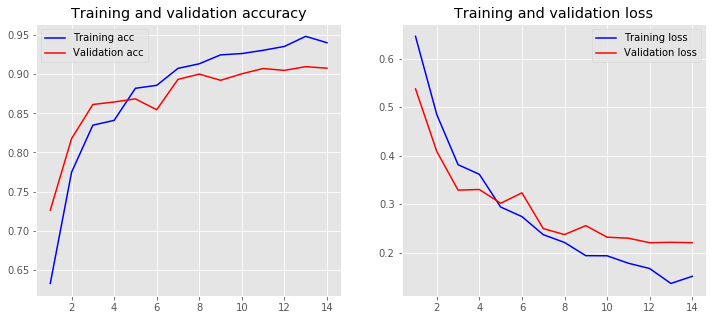

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
mc = ModelCheckpoint(filepath=r'/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 3 - SOURCE CODES AND FILES/Pretrained Models/FakeNews_LSTM_Glove-100-Emb.h5', verbose=1 , monitor='val_acc',save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history = model.fit(X_train, y_train, epochs = 15, batch_size=128, validation_data=(X_test, y_test),callbacks=[mc,es])

plot_history(history)

In [ ]:
%%time
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9723
Testing Accuracy:  0.9077
CPU times: user 1min 8s, sys: 0 ns, total: 1min 8s
Wall time: 1min 8s


In [ ]:
from sklearn import metrics

print("CONFUSION MATRIX")
pred = model.predict(X_test)
cm = metrics.confusion_matrix(np.argmax(y_test, axis= 1),np.argmax(pred, axis = 1), labels=[0,1]) # 'FAKE','REAL'
print(cm)
print()
print(classification_report(y_test.argmax(axis=1),pred.argmax(axis=1), target_names=['FAKE','REAL']))


CONFUSION MATRIX
[[571  64]
 [ 52 575]]

              precision    recall  f1-score   support

        FAKE       0.92      0.90      0.91       635
        REAL       0.90      0.92      0.91       627

    accuracy                           0.91      1262
   macro avg       0.91      0.91      0.91      1262
weighted avg       0.91      0.91      0.91      1262



# EXPERIMENT

Enter the Embedding Dimensions 100 or 200 or 300 : 
None300
Loaded 400000 word vectors.
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 1000, 300)         17334900  
_________________________________________________________________
lstm_7 (LSTM)                (None, 1000, 90)          140760    
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 90)                0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 90)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                5824      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_______________________________

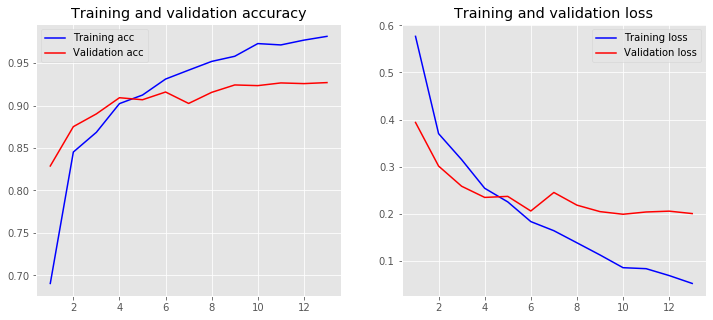

In [ ]:
%%time
# load the whole embedding into memory

embeddings_index = dict()
embedding_dims = []

#f = open('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 3 -SOURCE CODES AND FILES/Pretrained Models/Deep Learning Models - With Glove Embedding/glove.6B.100d.txt')

embedding_dims = input(print("Enter the Embedding Dimensions 100 or 200 or 300 : "))

f = open('/content/drive/My Drive/Colab Notebooks/TEXT EMBEDDINGS FILES/Glove_Embedding/glove.6B.{}d.txt'.format(embedding_dims))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Loaded %s word vectors.' % len(embeddings_index))

################################################################################

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, int(embedding_dims)))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

################################################################################


model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(vocab_size, output_dim = int(embedding_dims) , weights=[embedding_matrix], input_length=maxlen, trainable=False,name = 'embeddings'))
model.add(LSTM(90, return_sequences=True,))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
mc = ModelCheckpoint(filepath=r'/content/FakeNews_LSTM_Glove-{}-Emb.h5'.format(int(embedding_dims)), verbose=1 , monitor='val_acc',save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(X_train, y_train, epochs = 15, batch_size=128, validation_data=(X_test, y_test),callbacks=[mc,es],verbose = 2)

plot_history(history)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

from sklearn import metrics

print("CONFUSION MATRIX")
pred = model.predict(X_test)
cm = metrics.confusion_matrix(np.argmax(y_test, axis= 1),np.argmax(pred, axis = 1), labels=[0,1]) # 'FAKE','REAL'
print(cm)
print()
print(classification_report(y_test.argmax(axis=1),pred.argmax(axis=1), target_names=['FAKE','REAL']))



Enter the Embedding Dimensions 100 or 200 or 300 : 
None200
Loaded 400000 word vectors.
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 1000, 200)         11556600  
_________________________________________________________________
lstm_8 (LSTM)                (None, 1000, 80)          89920     
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 80)                0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                5184      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_______________________________

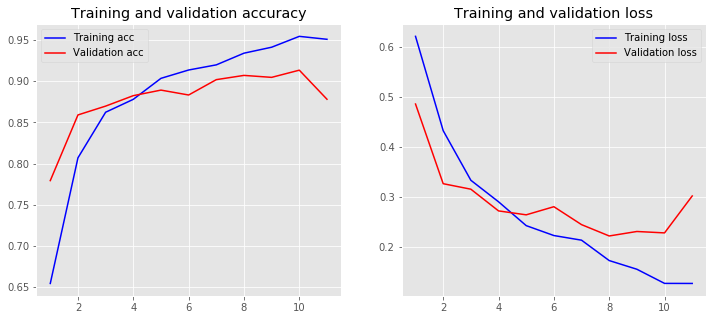

In [ ]:
%%time
# load the whole embedding into memory

embeddings_index = dict()
embedding_dims = []

#f = open('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 3 -SOURCE CODES AND FILES/Pretrained Models/Deep Learning Models - With Glove Embedding/glove.6B.100d.txt')

embedding_dims = input(print("Enter the Embedding Dimensions 100 or 200 or 300 : "))

f = open('/content/drive/My Drive/Colab Notebooks/TEXT EMBEDDINGS FILES/Glove_Embedding/glove.6B.{}d.txt'.format(embedding_dims))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Loaded %s word vectors.' % len(embeddings_index))

################################################################################

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, int(embedding_dims)))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

################################################################################


model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(vocab_size, output_dim = int(embedding_dims) , weights=[embedding_matrix], input_length=maxlen, trainable=False,name = 'embeddings'))
model.add(LSTM(80, return_sequences=True,))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
mc = ModelCheckpoint(filepath=r'/content/FakeNews_LSTM_Glove-{}-Emb.h5'.format(int(embedding_dims)), verbose=1 , monitor='val_acc',save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(X_train, y_train, epochs = 15, batch_size=128, validation_data=(X_test, y_test),callbacks=[mc,es],verbose = 2)

plot_history(history)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

from sklearn import metrics

print("CONFUSION MATRIX")
pred = model.predict(X_test)
cm = metrics.confusion_matrix(np.argmax(y_test, axis= 1),np.argmax(pred, axis = 1), labels=[0,1]) # 'FAKE','REAL'
print(cm)
print()
print(classification_report(y_test.argmax(axis=1),pred.argmax(axis=1), target_names=['FAKE','REAL']))

